In [1]:
# 라이브러리 설치
!pip install gdrive_dataset

In [2]:
from gdrivedataset import loader

file_id = "1A3_7oKAjZPntGPxTPxSD-kbfrEszy-6l"
loader.load_from_google_drive(file_id)

========== files ============

data/sample_submission.csv
data/train.csv
data/test.csv



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

In [4]:
DATA_DIR = 'data'
data = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))

In [5]:
data = data.drop('id', axis=1)
pd.set_option('display.max_columns', None)  # column 모두 표시되도록
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [6]:
def check_missing_col(dataframe):
  missing_col = []
  counted_missing_col = 0
  for i, col in enumerate(dataframe.columns):
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 있는 컬럼은: {col}입니다')
      print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
  if counted_missing_col == 0:
    print('결측치가 존재하지 않습니다')
  return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


In [7]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [8]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
target    

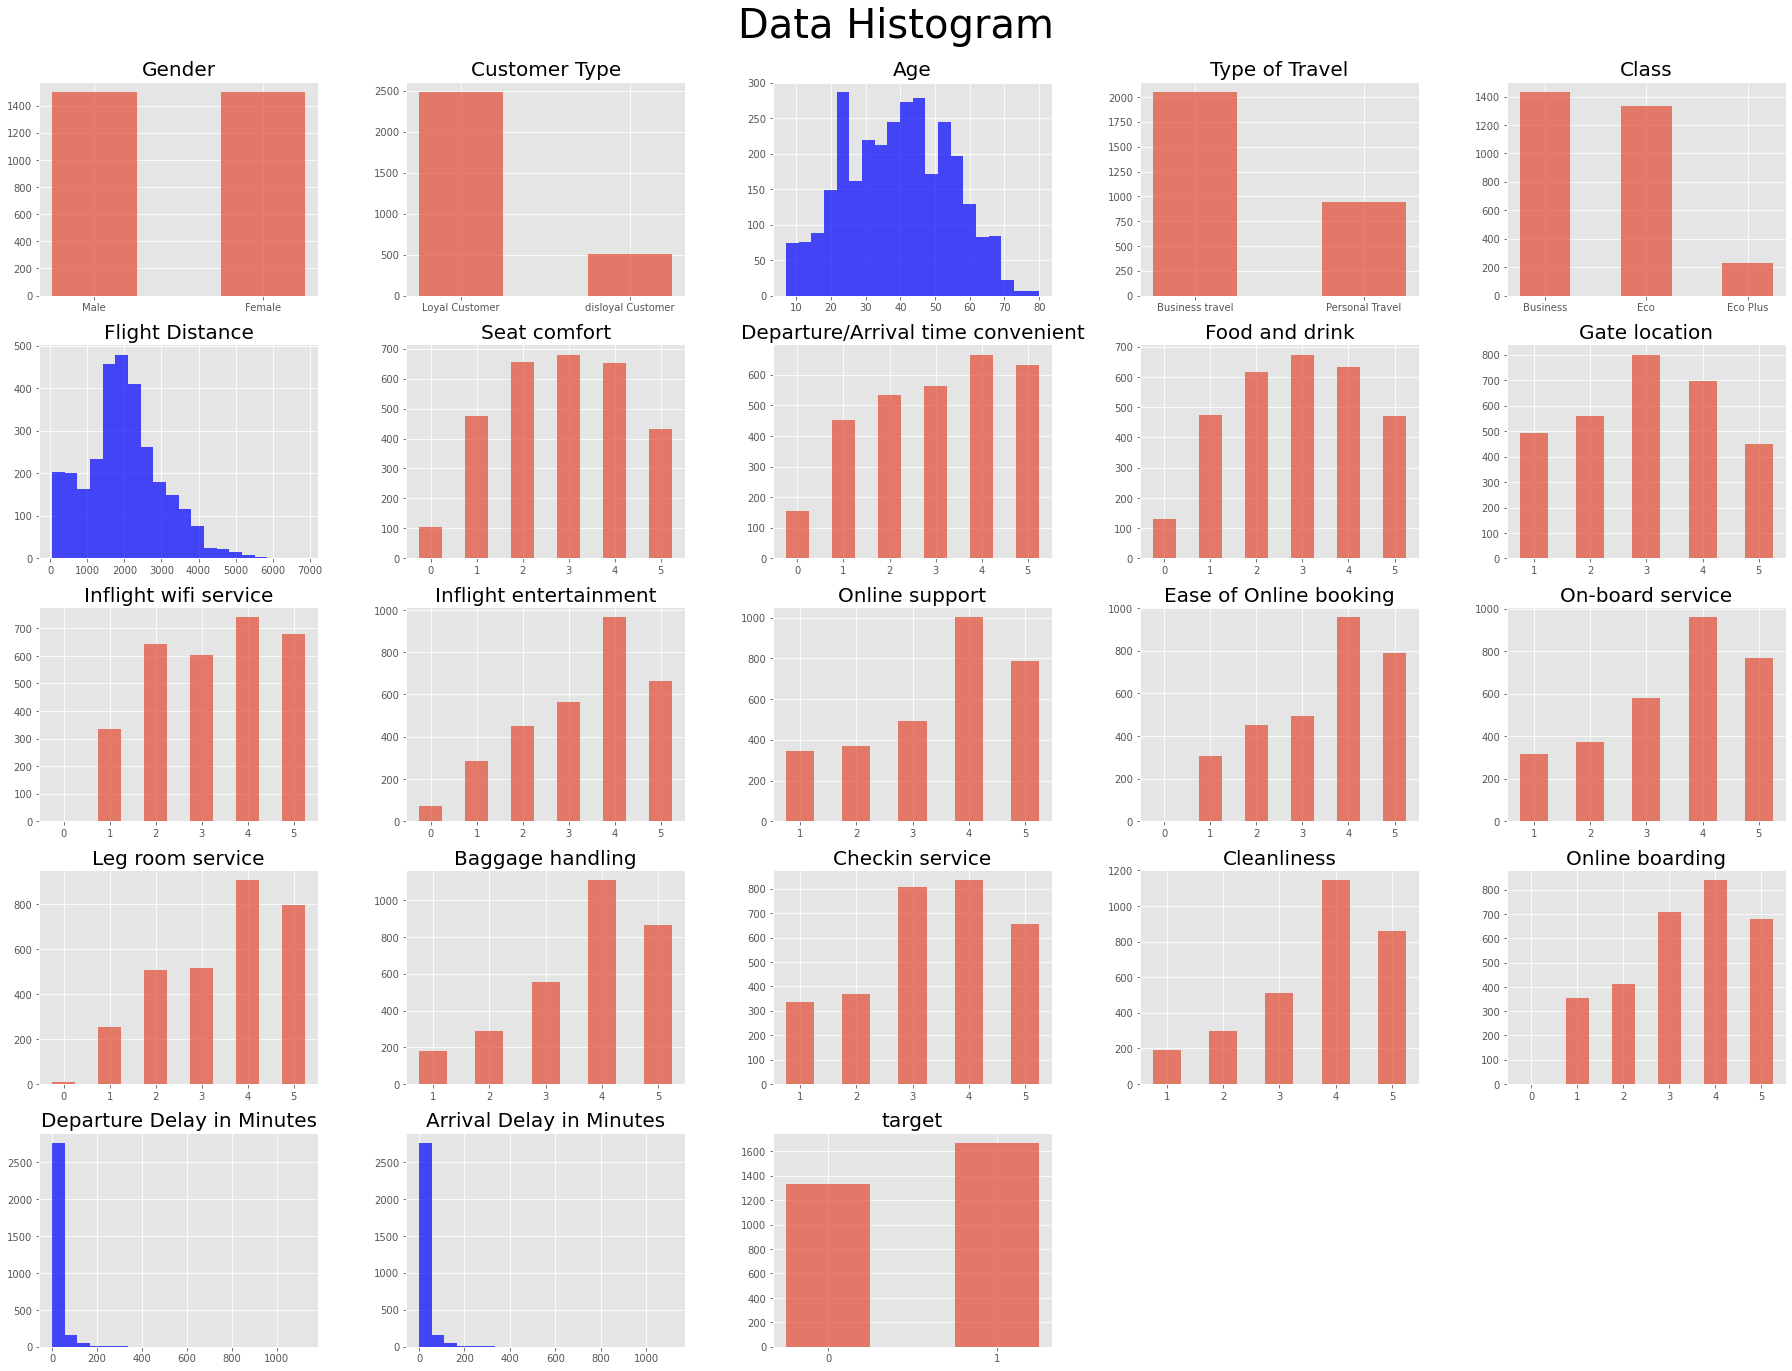

In [9]:
plt.style.use('ggplot')

# 히스토그램
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize=40)

cols = data.columns
for i in range(len(cols)):
  plt.subplot(5, 5, i+1)
  plt.title(cols[i],fontsize=20)
  if len(data[cols[i]].unique()) > 20:
    plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
  else:
    temp = data[cols[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
    plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

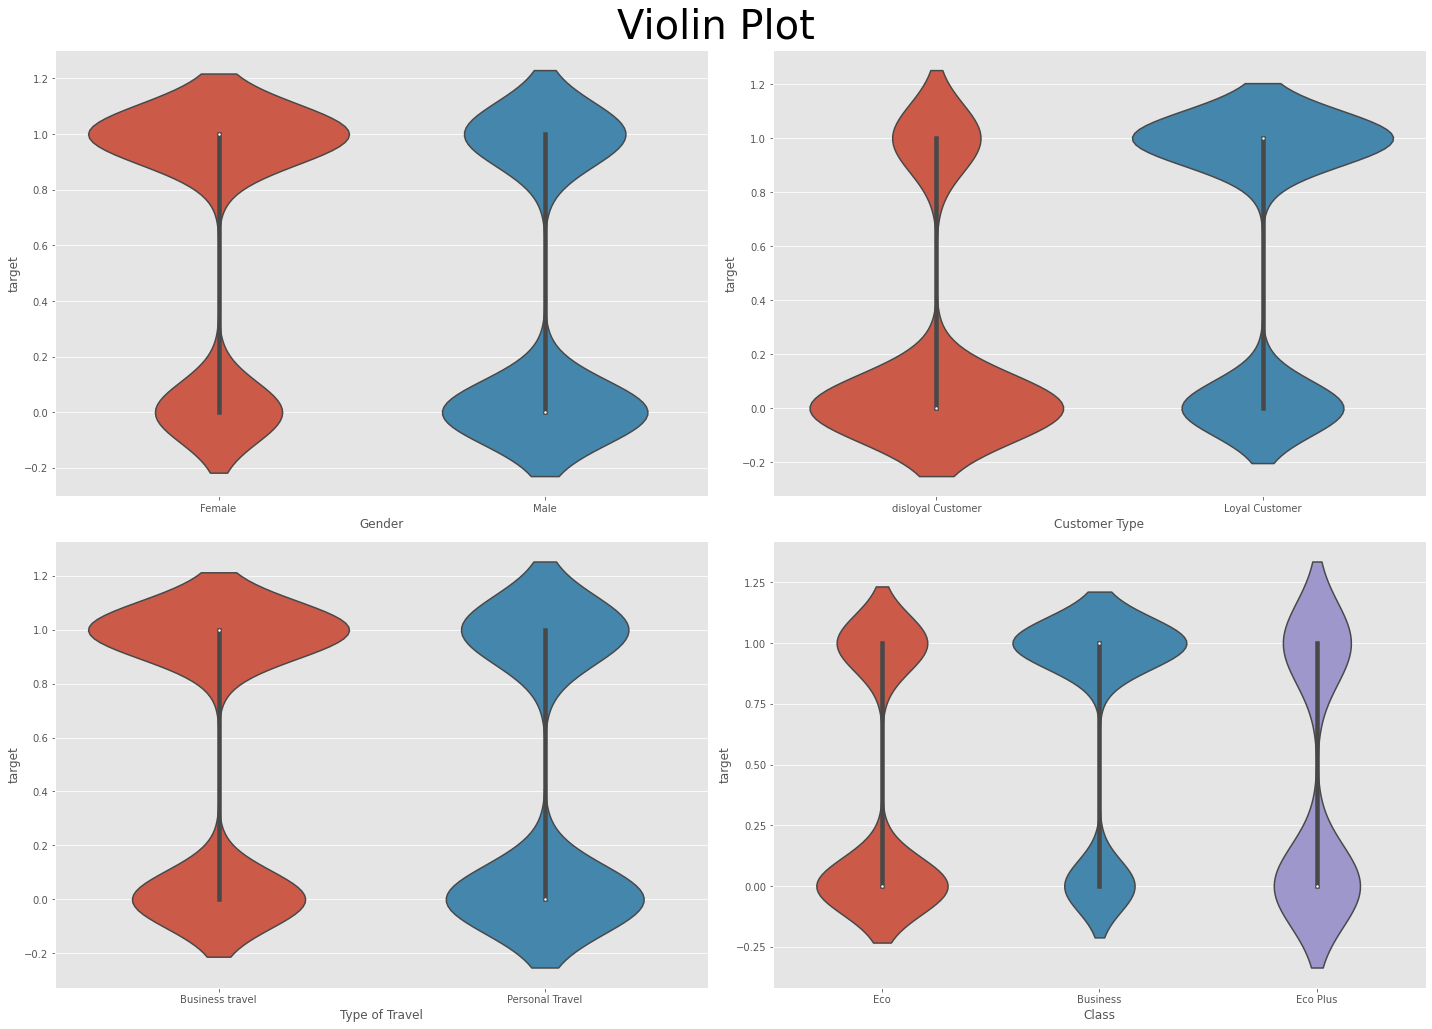

In [10]:
# 타겟 설정
target = 'target'

# 범주형 데이터 분리
categorical_features = data.columns[data.dtypes=='object']

plt.figure(figsize=(20, 15))
plt.suptitle("Violin Plot", fontsize=40)

# id 제외
for i in range(len(categorical_features)):
  plt.subplot(2, 2, i+1)
  plt.xlabel(categorical_features[i])
  plt.ylabel(target)
  sns.violinplot(x=data[categorical_features[i]], y=data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

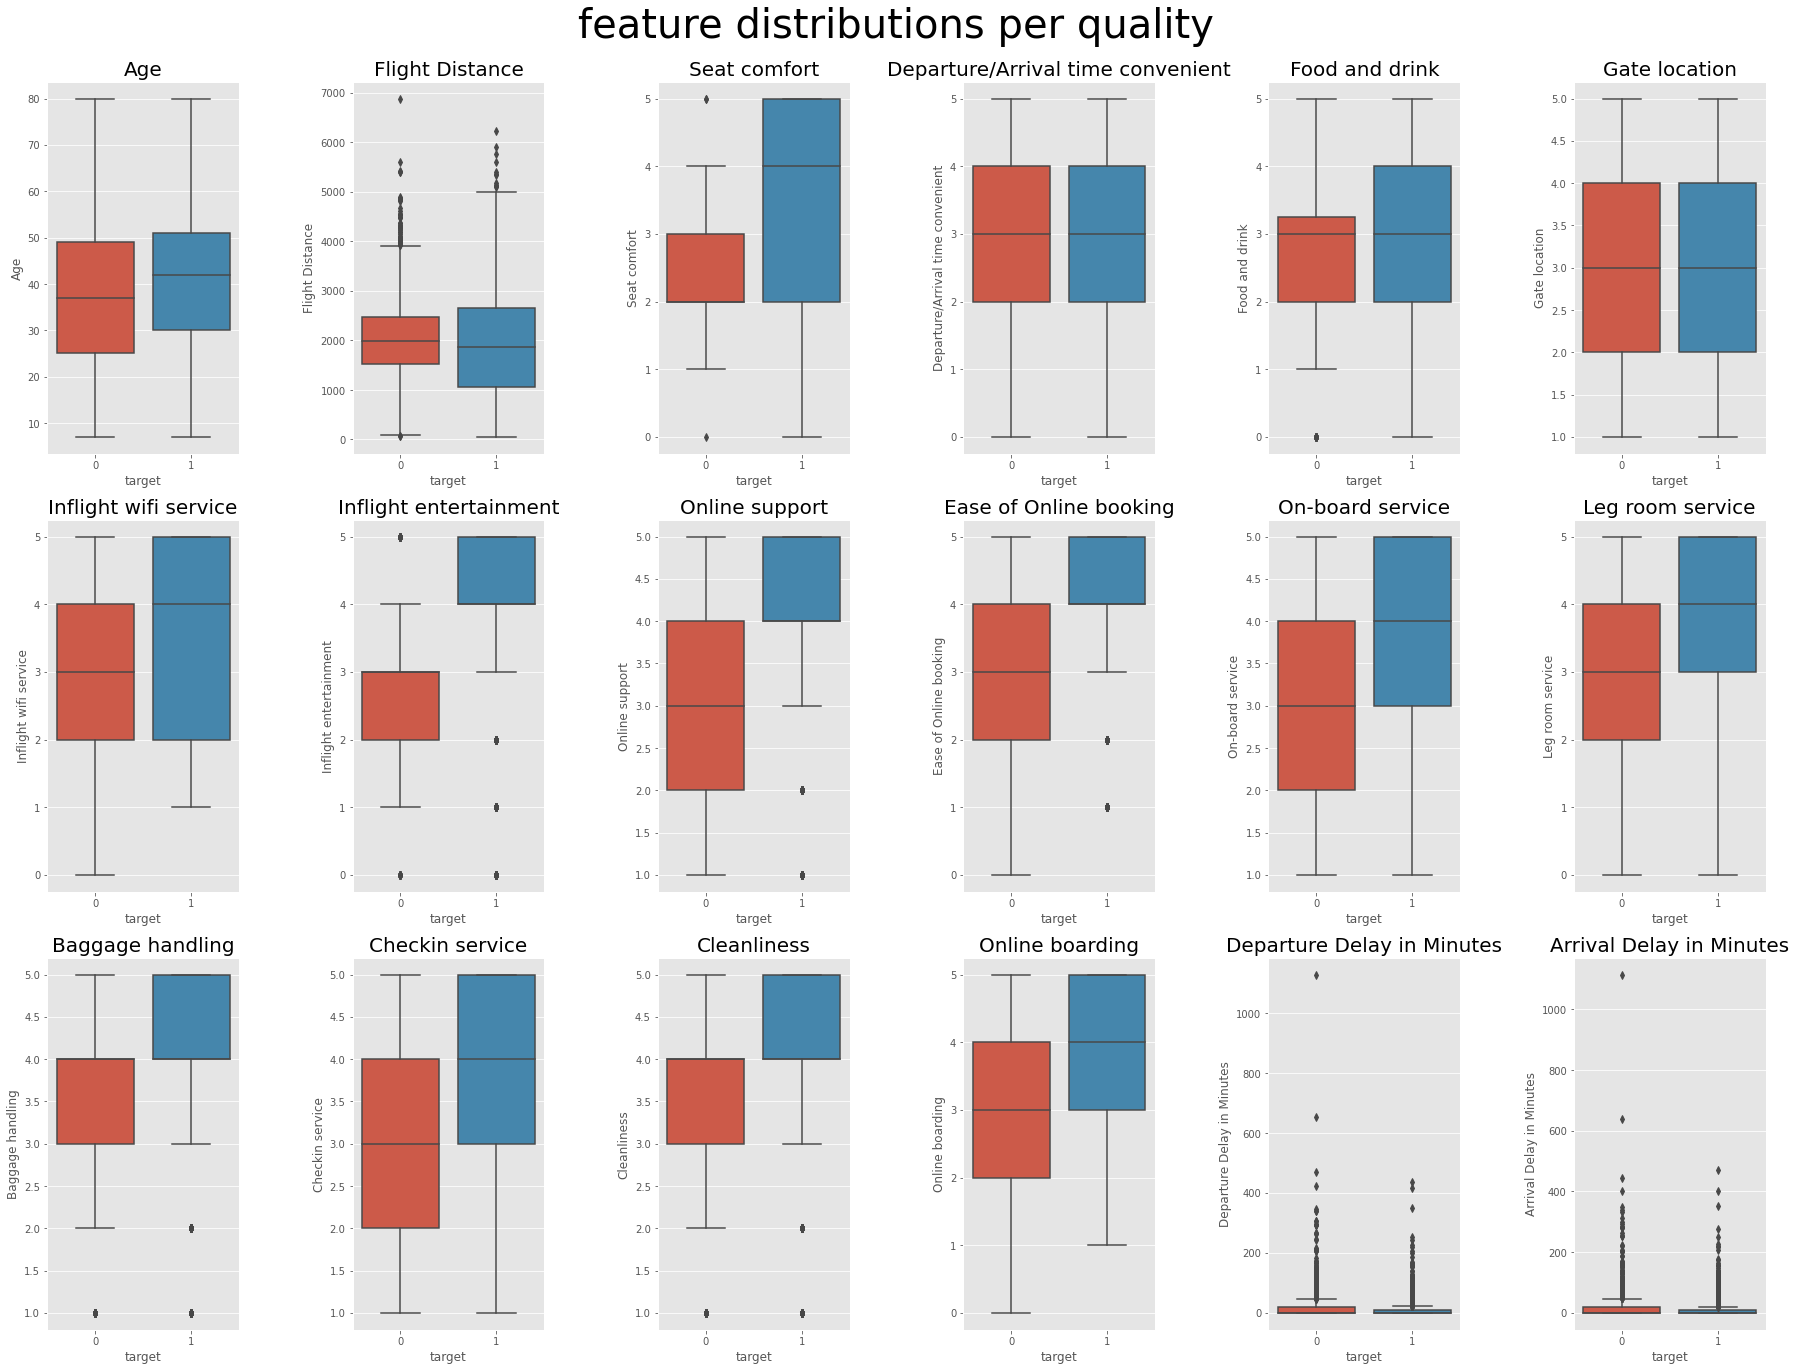

In [11]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize=40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
  sns.boxplot(x='target', y=col, ax=ax, data=num_data)
  ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
# 텍스트 형식의 데이터를 숫자로 변환
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

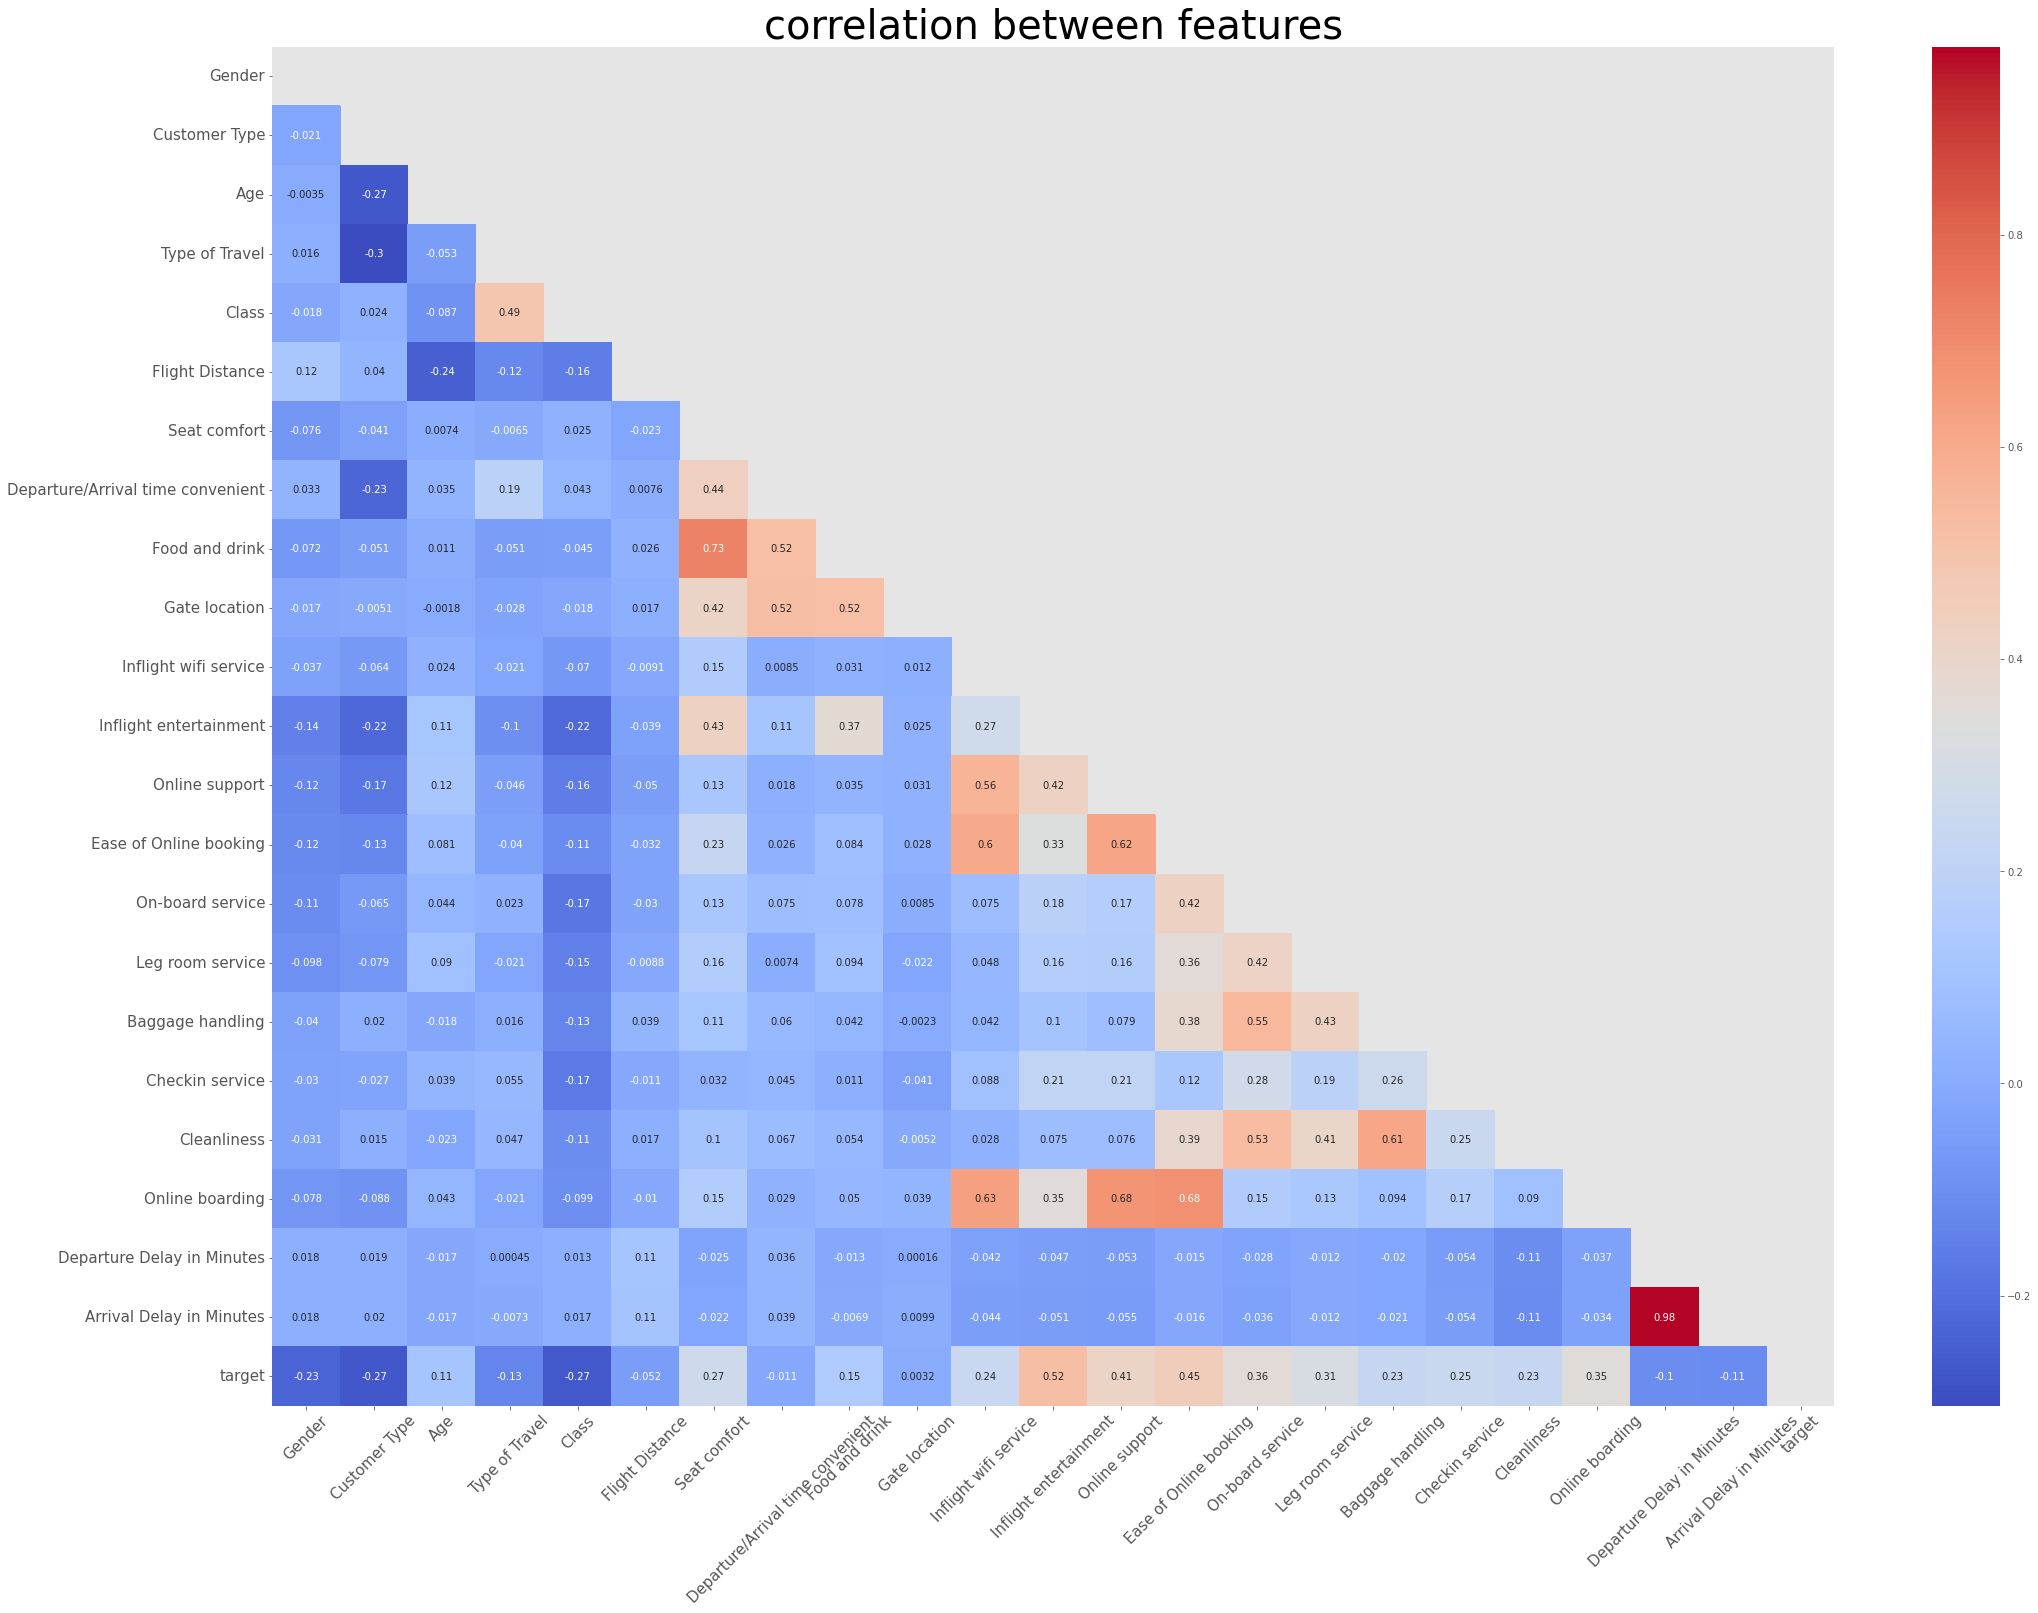

In [13]:
# 상관관계 분석도
plt.figure(figsize=(35, 25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [14]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))

In [15]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [16]:
# 데이터 전처리
train_x = train.drop(["id", "target"], axis=1)
train_y = train['target']

# 라벨 인코딩을 하기 위한 dictionary map 생성 함수
def make_label_map(dataframe):
  label_maps = {}
  for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
      label_map = {'unknown': 0}
      for i, key in enumerate(dataframe[col].unique()):
        label_map[key] = i+1
      label_maps[col] = label_map
  return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
  for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
      dataframe[col] = dataframe[col].map(label_map[col])
      dataframe[col] = dataframe[col].fillna(label_map[col]['unknown'])
  return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train_x)
train_x = label_encoder(train_x, label_map)
train_x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,22,1,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0
1,1,2,37,1,2,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0
2,2,2,46,1,2,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0
3,1,1,24,1,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0
4,1,2,58,1,2,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0


In [17]:
# 수치형 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

num_features = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

scaler = MinMaxScaler()
train_x[num_features] = scaler.fit_transform(train_x[num_features])
train_x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0.205479,1,1,0.226501,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0.000000,0.000000
1,1,2,0.410959,1,2,0.403807,2,4,4,4,1,4,3,5,5,4,2,1,5,2,0.015957,0.016143
2,2,2,0.534247,1,2,0.376281,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0.000000,0.000000
3,1,1,0.232877,1,1,0.336164,3,3,3,3,3,3,3,3,2,4,5,3,4,3,0.008865,0.001794
4,1,2,0.698630,1,2,0.007760,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0.000000,0.000000


In [19]:
# Logistic Regression 모델 설계

np.random.seed(1)

class LogisticRegression:
  
  # sigmoid 함수 생성
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
  
  # loss function 생성
  def loss_function(self, X, y, weights):
    total = len(X)
    z = np.dot(X, weights)
    prediction1 = y * np.log(self.sigmoid(z))
    prediction2 = (1 - y) * np.log(1 - self.sigmoid(z))
    return -sum(prediction1 + prediction2) / total
  
  # gradient descent 방법을 이용해 학습 함수 생성
  # learning rate와 epochs 파라미터 지정
  def fit(self, X, y, epochs=500, lr = 0.01):
    loss = []
    weights = np.random.rand(X.shape[1])
    total = len(X)

    for epoch in range(epochs):
      y_hat = self.sigmoid(np.dot(X, weights))
      weights = weights - (lr * np.dot(X.T, y_hat - y) / total)
      loss.append(self.loss_function(X, y, weights))

    self.weights = weights
    self.loss = loss
  
  def predict(self, X):
    z = np.dot(X, self.weights)
    result = self.sigmoid(z)
    return result

  def to_bin(self, result):
    arr = []
    for i in result:
      if i > 0.5:
        arr.append(1)
      else:
        arr.append(0)
    return arr


In [21]:
# 모델 학습
lr = LogisticRegression()
lr.fit(train_x, train_y)

In [23]:
# 추론
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
test = test.drop(["id"], axis=1)

test = label_encoder(test, label_map)
test[num_features] = scaler.fit_transform(test[num_features])

In [24]:
pred = lr.predict(test)
pred_bin = lr.to_bin(pred)


In [25]:
sample_submission = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))

sample_submission.target = pred_bin
sample_submission.to_csv('submission.csv', index=False)